In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import joblib

In [3]:
import time

starting_time = time.time()
data = pd.read_csv('/content/drive/My Drive/Datasets/RAVTESS_MFCC_Observed (2).csv')
print("data loaded in " + str(time.time()-starting_time) + "ms")

print(data.head())

data loaded in 0.7549717426300049ms
   Unnamed: 0          0          1          2          3          4  \
0        3347 -328.75920  35.476677 -25.124292  21.050790 -16.945532   
1        4384 -322.34244  27.012909 -21.041162  30.110968 -31.182775   
2         398 -379.28024  -1.588895 -36.209118  -3.341632 -20.345580   
3        2931 -298.13745  38.194805 -38.945360  29.362114 -23.021370   
4        1111 -518.45734  33.004880 -26.324490   2.800780 -13.575833   

           5          6          7          8  ...         31        32  \
0  -1.700746 -18.376793 -13.726419  -6.895043  ...   3.333393 -0.103293   
1  -6.465052  -5.357755 -15.746977 -15.863665  ...  11.053117  5.722385   
2  -0.582245 -10.095681  -1.402506 -12.594262  ...   1.007842 -0.838687   
3   5.751432 -13.487757  -9.973127  -0.785835  ...  -2.240898  4.004270   
4 -11.659295 -12.292440  -8.589990 -11.856021  ...   3.181478  0.598617   

         33         34        35        36        37        38        39  \
0  8

In [4]:
data.shape

(5252, 42)

In [5]:
#printing all columns
data.columns

Index(['Unnamed: 0', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', 'emotion'],
      dtype='object')

In [6]:
#dropping the column Unnamed: 0 to removed shuffled index
data = data.drop('Unnamed: 0',axis=1)

In [7]:
data.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', 'emotion'],
      dtype='object')

In [8]:
#separating features and target outputs
X = data.drop('emotion', axis = 1).values
y = data['emotion'].values

In [ ]:
#Added by H
# X = joblib.load('/content/X.joblib')
# print(X.shape)
# y = joblib.load('/content/y.joblib')
# print(y.shape)

In [9]:
print(pd.DataFrame(y))

              0
0         happy
1         angry
2         angry
3         happy
4           sad
...         ...
5247    neutral
5248      angry
5249      happy
5250        sad
5251  surprised

[5252 rows x 1 columns]


## SVM

Implementing SVM with Scikit-Learn

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
X.shape, y.shape

((5252, 40), (5252,))

In [12]:
# prompt: show me if the data is balanced

from collections import Counter

print(Counter(y))

Counter({'happy': 776, 'angry': 776, 'sad': 776, 'fear': 776, 'disgust': 592, 'surprised': 592, 'neutral': 588, 'calm': 376})


In [13]:
np.unique(y)

array(['angry', 'calm', 'disgust', 'fear', 'happy', 'neutral', 'sad',
       'surprised'], dtype=object)

X variable contains attributes while y variable contains corresponding labels.

Once the data is divided into attributes and labels, the final preprocessing step is to divide data into training and test sets. The model_selection library of the Scikit-Learn library contains the train_test_split method that allows us to divide data into training and test sets.

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

It is the time to train our SVM on the training data. Scikit-Learn contains the svm library, which contains built-in classes for different SVM algorithms. Since we are going to perform a classification task, we will use the support vector classifier class, which is written as SVC in the Scikit-Learn's svm library. We have set the kernel to linear.

In [ ]:
from sklearn.svm import SVC

svclassifier = SVC(kernel = 'linear')

In [15]:
from sklearn.tree import DecisionTreeClassifier
dtc_classifier = DecisionTreeClassifier()

The fit method of SVC class is called to train the algorithm on the training data, which is passed as a parameter to the fit method. Execute the following code to train the algorithm:

In [ ]:
# import time

# starting_time = time.time()
# svclassifier.fit(X_train, y_train)
# print("Trained model in %s ms " % str(time.time() - starting_time))

To make predictions, the predict method of the SVC class is used.

In [ ]:
# y_pred = svclassifier.predict(X_test)

Confusion matrix, precision, recall, and F1 measures are the most commonly used metrics for classification tasks. Scikit-Learn's metrics library contains the classification_report and confusion_matrix methods, which can be readily used to find out the values for these important metrics.
We have used the following code for finding these metrics:

In [ ]:
# from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
# import seaborn as sn

# print(classification_report(y_test,y_pred))

# acc = float(accuracy_score(y_test,y_pred))*100
# print("----accuracy score %s ----" % acc)

# cm = confusion_matrix(y_test,y_pred)
# df_cm = pd.DataFrame(cm)
# sn.heatmap(df_cm, annot=True, fmt='')
# plt.show()

Now by calculating the training accuracy and comparing with testing accuracy, we can check for overfitting of data

In [ ]:
# train_acc = float(svclassifier.score(X_train, y_train)*100)
# print("----train accuracy score %s ----" % train_acc)

# test_acc = float(svclassifier.score(X_test, y_test)*100)
# print("----test accuracy score %s ----" % test_acc)

## Cross-Validation

5-fold cross validation of the dataset with the SVC classifier.

In [ ]:
# from sklearn.model_selection import cross_val_score

# # no. of folds cv = 5
# cv_results = cross_val_score(svclassifier, X, y, cv = 5)
# print(cv_results)

## Scaling

When performing the linear SVM classification, it is often helpful to normalize the training data, for example by subtracting the mean and dividing by the standard deviation, and afterwards scale the test data with the mean and standard deviation of training data.

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.ensemble import RandomForestClassifier as RFC

# Splitting dataset into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

# Setup the pipeline steps
steps = [('scaler', StandardScaler()),
         ('RFC', RFC())]

# Create the pipeline
pipeline = Pipeline(steps)

# Fit the pipeline to the training set
rfc_scaled = pipeline.fit(X_train, y_train)

# Instantiate and fit a classifier to the unscaled data
rfc_unscaled = RFC().fit(X_train, y_train)

# Compute and print metrics
print('Accuracy with Scaling: {}'.format(rfc_scaled.score(X_test, y_test)))
print('Accuracy without Scaling: {}'.format(rfc_unscaled.score(X_test, y_test)))


Accuracy with Scaling: 0.857278782112274
Accuracy without Scaling: 0.8563273073263559


### Generalization check
Checking for overfitting or underfitting by comparing the training and testing scores of the model

In [18]:
train_acc = float(rfc_scaled.score(X_train, y_train)*100)
print("----train accuracy score %s ----" % train_acc)

test_acc = float(rfc_scaled.score(X_test, y_test)*100)
print("----test accuracy score %s ----" % test_acc)

----train accuracy score 100.0 ----
----test accuracy score 85.7278782112274 ----


In [22]:
start = time.time()
scaled_predictions = rfc_scaled.predict(X_test)
end = time.time()
print("Time : "+str(end-start))

Time : 0.04889082908630371


### Classification reports and Confusion Matrix

              precision    recall  f1-score   support

       angry       0.94      0.93      0.93       168
        calm       0.60      0.85      0.70        71
     disgust       0.86      0.85      0.85       126
        fear       0.78      0.85      0.82       127
       happy       0.92      0.85      0.88       152
     neutral       0.94      0.88      0.91       121
         sad       0.87      0.78      0.82       169
   surprised       0.87      0.89      0.88       117

    accuracy                           0.86      1051
   macro avg       0.85      0.86      0.85      1051
weighted avg       0.87      0.86      0.86      1051

----accuracy score 85.7278782112274 ----


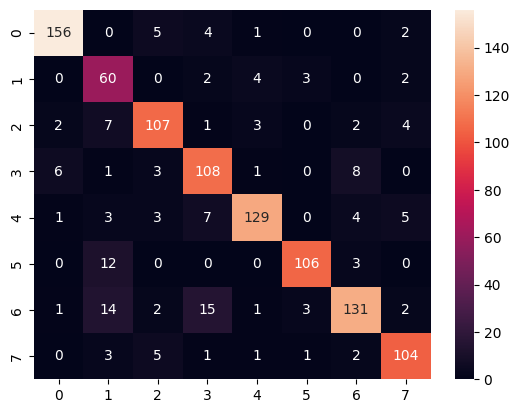

In [20]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import seaborn as sn

print(classification_report(y_test,scaled_predictions))

acc = float(accuracy_score(y_test,scaled_predictions))*100
print("----accuracy score %s ----" % acc)

cm = confusion_matrix(y_test,scaled_predictions)
df_cm = pd.DataFrame(cm)
sn.heatmap(df_cm, annot=True, fmt='')
plt.show()

#### Cross Validation

In [21]:
from sklearn.model_selection import cross_val_score

# no. of folds cv = 5
cv_results = cross_val_score(rfc_scaled, X, y, cv = 5)
print(cv_results)

[0.87059943 0.86869648 0.84952381 0.85619048 0.85619048]


Stratified Cross validation

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Create a StratifiedKFold object
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform stratified cross-validation
cv_results = cross_val_score(svc_scaled, X, y, cv=stratified_kfold)

# Print the results
print("Cross-validation scores:", cv_results)
print("Mean CV score:", cv_results.mean())


Cross-validation scores: [0.81351094 0.85347288 0.83428571 0.83904762 0.83904762]
Mean CV score: 0.8358729554619184


Saving the modle in different formats

In [ ]:
import joblib

# Save the pipeline (scaler + SVM)
joblib.dump(svc_scaled, 'svm_scaled_model.pkl')


['svm_scaled_model.pkl']

In [ ]:
from joblib import dump, load

# Assuming model is your trained model
dump(svc_scaled, 'emotion_model.joblib')


['emotion_model.joblib']